# 📊 Assignment: Predicting 2024 Data Science Salaries Using Linear Regression

**Course**: Data Analytics with Python  
**Instructor**: Leonard Andrew Mesiera  
**Due Date**: October 22, 2025

## 🎯 Learning Objectives
By the end of this assignment, you will be able to:
- Load and explore a real-world dataset
- Prepare data for linear regression (feature engineering, encoding, cleaning)
- Train a simple linear regression model using `scikit-learn`
- Evaluate your model using metrics like R² and interpret results
- Make predictions for future years (e.g., 2024)

## 📁 Dataset
You are given the file: `Data Science Salary 2021 to 2023.csv`

This dataset contains salary information for data professionals from 2021 to 2023, including:
- `work_year`: The year the salary was recorded
- `experience_level`: EN (Entry), MI (Mid), SE (Senior), EX (Executive)
- `job_title`: e.g., Data Scientist, Data Analyst, etc.
- `salary_in_usd`: Salary converted to USD (this is your target variable)
- Other useful columns: `employment_type`, `company_location`, `company_size`

Your goal: **Predict average salaries for 2024** using linear regression.

## 🛠️ Part 1: Setup and Data Loading

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('Data Science Salary 2021 to 2023.csv')

# Display first few rows
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,company_location,company_size
0,2023,EN,FT,Applied Scientist,213660,USD,213660,US,L
1,2023,EN,FT,Applied Scientist,130760,USD,130760,US,L
2,2023,EN,FT,Data Quality Analyst,100000,USD,100000,NG,L
3,2023,EN,FT,Compliance Data Analyst,30000,USD,30000,NG,L
4,2023,EN,FT,Applied Scientist,204620,USD,204620,US,L


In [6]:
# Check basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3761 entries, 0 to 3760
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         3761 non-null   int64 
 1   experience_level  3761 non-null   object
 2   employment_type   3761 non-null   object
 3   job_title         3761 non-null   object
 4   salary            3761 non-null   int64 
 5   salary_currency   3761 non-null   object
 6   salary_in_usd     3761 non-null   int64 
 7   company_location  3761 non-null   object
 8   company_size      3761 non-null   object
dtypes: int64(3), object(6)
memory usage: 264.6+ KB


## 🔍 Part 2: Exploratory Data Analysis (EDA)

Answer the following in markdown cells below (or as code comments):

1. How many unique job titles are there?
2. What is the average salary (`salary_in_usd`) per `work_year`?
3. Create a bar plot showing average salary by `experience_level`.

> 💡 Tip: Use `groupby()` and `mean()`.

<h1>1. How many unique job titles are there?

In [13]:
# Your EDA code here
UJ = df["job_title"].nunique()
print("Unique jobs:", UJ)

Unique jobs: 93


<h2>Answer:</h2>
<p>There are 93 unique job titles</p>
<hr>

<h1>2. What is the average salary (`salary_in_usd`) per `work_year`?

In [15]:
av_s = df.groupby("work_year")["salary_in_usd"].mean()
av_s = av_s.to_frame().reset_index()
av_s.columns = ["Work Year", "Average Salary (USD)"]
av_s

,Work Year,Average Salary (USD)
0,2020,92302.631579
1,2021,94087.208696
2,2022,133379.510804
3,2023,148954.558413


<h2>Answer:</h2>
<p>The average salary during 2020, 2021, 2022, and 2023 are respectively <b>92.3k, 94.08k, 123.37k, and 148.95k </b></p>
<hr>

<h1>3. Create a bar plot showing average salary by `experience_level`.</h1>

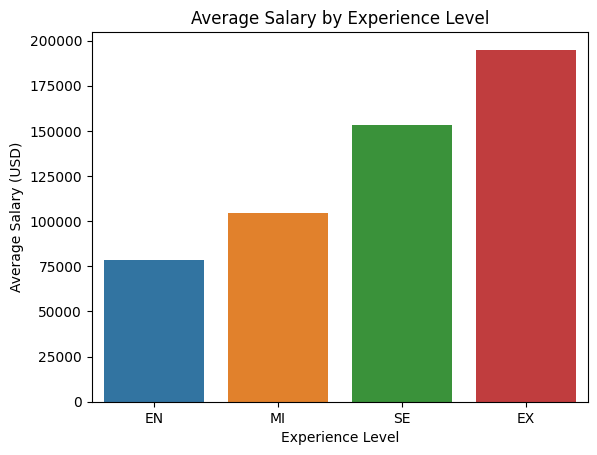

In [16]:
av_s_byexp = df.groupby("experience_level", as_index=False)["salary_in_usd"].mean().sort_values("salary_in_usd")

sns.barplot(data=av_s_byexp, x="experience_level", y="salary_in_usd", hue="experience_level", dodge=False)
plt.title("Average Salary by Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Average Salary (USD)")
plt.show()

<h2>Answer:</h2>
<p>More experienced positions (experience in general) bigger salary</p>
<hr>

## 🧹 Part 3: Data Preprocessing for Linear Regression

We will predict `salary_in_usd` using **only numerical or encoded categorical features**.

### Steps:
1. Select features: `work_year`, `experience_level`, and optionally `job_title` (you decide!)
2. Encode categorical variables (`experience_level`) using `LabelEncoder` or `pd.get_dummies()`
3. Define `X` (features) and `y` (target = `salary_in_usd`)

> ⚠️ **Important**: Do NOT include `salary`, `salary_currency`, or `salary_in_usd` in your features!

<h1>P3: predicting salary using numerical features and/or categorical features</h1>

In [18]:

e1 = LabelEncoder()
e2 = LabelEncoder()
e3 = LabelEncoder()
e4 = LabelEncoder()

df["exp_num"] = e1.fit_transform(df["experience_level"])
df["emp_num"] = e2.fit_transform(df["employment_type"])
df["job_num"] = e3.fit_transform(df["job_title"])
df["comp_num"] = e4.fit_transform(df["company_size"])

X = df[["work_year", "exp_num", "emp_num", "job_num", "comp_num"]]
y = df["salary_in_usd"]

X.head()

,work_year,exp_num,emp_num,job_num,comp_num
0,2023,0,2,8,0
1,2023,0,2,8,0
2,2023,0,2,41,0
3,2023,0,2,22,0
4,2023,0,2,8,0


<h2>Answer:</h2>
<p>The data shows entries from 2023 share similiar experiences in terms of level and company. with the job title being the only differentiating factor that most probably determines their salary</p>
<hr>

## 📈 Part 4: Train a Linear Regression Model

In [9]:
# Split data into train and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")

R² Score: 0.15
RMSE: 59164.82


<h2>Answer:</h2>
<p>the model resulteed in a R² Score of <b>0.15</b> and an RMSE of <b>59164.82</b> which shows it predicts salaries with low accuracy</p>
<hr>

## 🔮 Part 5: Predict 2024 Salaries

Now, create a small DataFrame for **2024** with different experience levels and predict their salaries.

Use the same encoding as before!

In [21]:
# Map experience levels to encoded values (check your LabelEncoder!)
# Example: EN=0, MI=1, SE=2, EX=3 (confirm with `le.classes_`)

future_data = pd.DataFrame({
    'work_year': [2024, 2024, 2024, 2024],
    'experience_level_encoded': [0, 1, 2, 3]  # EN, MI, SE, EX
})

# Predict
predicted_salaries = model.predict(future_data)

# Display results
results = pd.DataFrame({
    'Experience Level': ['Entry', 'Mid', 'Senior', 'Executive'],
    'Predicted 2024 Salary (USD)': predicted_salaries
})
results

,Experience Level,Predicted 2024 Salary (USD)
0,Entry,111694.914909
1,Mid,131967.434578
2,Senior,152239.954247
3,Executive,172512.473916


> additonal info taken from a peer

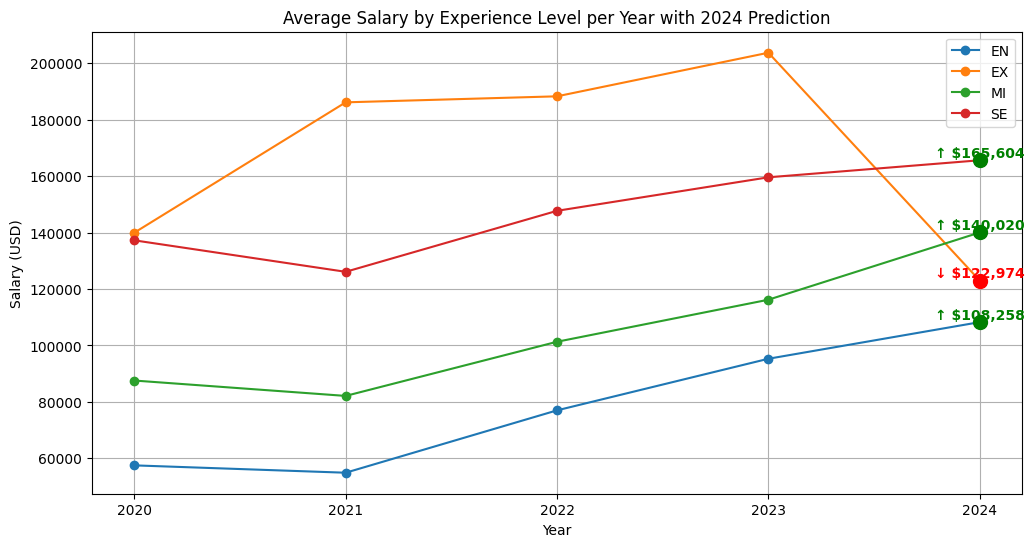

In [23]:

# Historical average salary per year per experience level
avg_salary = df.groupby(['work_year', 'experience_level'])['salary_in_usd'].mean().unstack()

# 2024 predictions
pred_results = pd.DataFrame({
    "Experience Level": ["Entry Level", "Mid Level", "Senior Level", "Executive Level"],
    "Predicted Salary (USD)": [108258.43, 122973.65, 140019.65, 165603.95]
})

# Combine historical averages with 2024 predictions
pred_avg_salary = avg_salary.copy()
for i, level in enumerate(avg_salary.columns):
    pred_avg_salary.loc[2024, level] = pred_results.loc[i, "Predicted Salary (USD)"]

plt.figure(figsize=(12,6))

# Plot lines for each experience level
for level in pred_avg_salary.columns:
    plt.plot(pred_avg_salary.index, pred_avg_salary[level], marker='o', label=level)

# Annotate 2024 predictions with colored arrows
last_year = avg_salary.index.max()
for i, level in enumerate(avg_salary.columns):
    change = pred_avg_salary.loc[2024, level] - avg_salary.loc[last_year, level]
    color = "green" if change >= 0 else "red"
    sign = "↑" if change >= 0 else "↓"
    plt.scatter(2024, pred_avg_salary.loc[2024, level], color=color, s=100, zorder=5)
    plt.text(2024, pred_avg_salary.loc[2024, level] + 1000,
             f'{sign} ${pred_avg_salary.loc[2024, level]:,.0f}', 
             ha='center', color=color, fontweight='bold')

plt.title('Average Salary by Experience Level per Year with 2024 Prediction')
plt.xlabel('Year')
plt.ylabel('Salary (USD)')
plt.xticks(list(sorted(df["work_year"].unique())) + [2024])
plt.grid(True)
plt.legend()
plt.show()

<h2>Answer:</h2>
<p>The overall salary of all position except executive would increase.. with the Executive hacing a significant decease compared to before. still being the highest paying position, I would consider this as a positive as it lessens the wealth gap that would hellp those in lower positions where it is needed</p>
<hr>

## 📝 Part 6: Reflection (Answer in a Markdown Cell)

1. Does your model make reasonable predictions? Why or why not?
2. What are the limitations of using only `work_year` and `experience_level`?
3. How could you improve this model? (Think: more features, better encoding, etc.)
4. Why is **R² not enough** to trust your predictions?

> 💡 Remember: Linear regression assumes a **linear trend**—but real salaries may grow non-linearly!

<h2>Answers:</h2>

> 1. Yes as it is based on previous assestment and data which are reasonable basis with logical hypothesis/predictions

> 2. Their are other factors that plays a significant role in whatever we are trying to asses and such work_year and exerience_level can only help us to certain extend that would be streching certain connections

> 3. Making a better model we could always add more data concerning certain details of the job like titles and company size but a interesting set of information would be locations and as well as company stocks or value determining factors in their individual market

> 4, Since we are handling real world data and in the real world a lot of independent factors are in play where R^2 gives us

## 📤 Submission Instructions

- Save this notebook as: `LastName_FirstName_SalaryPrediction.ipynb`
- Ensure all code runs without errors
- Include your answers to the reflection questions
- Submit via [your LMS/email/etc.]

Good luck! 🚀